# WALMART ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
train_df = pd.read_csv("C:\\Users\\shash\\OneDrive\\Desktop\\Python Projects\Walmart Analysis\\train.csv")
test_df = pd.read_csv("C:\\Users\\shash\\OneDrive\\Desktop\\Python Projects\Walmart Analysis\\test.csv")
features_df = pd.read_csv("C:\\Users\\shash\\OneDrive\\Desktop\\Python Projects\Walmart Analysis\\features.csv")
stores_df = pd.read_csv("C:\\Users\\shash\\OneDrive\\Desktop\\Python Projects\Walmart Analysis\\stores.csv")

In [3]:
# Train Dataframe
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
# Test Dataframe
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
# Features Dataframe
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
# Stores Dataframe
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [9]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [10]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [11]:
stores_df.shape

(45, 3)

In [12]:
features_df.shape

(8190, 12)

In [13]:
train_df.shape

(421570, 5)

In [14]:
# Null values of train_df
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [15]:
# Null values of test_df
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [16]:
# Null values of feature_df
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [17]:
# Null values of store_df
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [18]:
# Creating a dataset of features_df and stores_df by merging them
# The INNER JOIN keyword selects records that have matching values in both tables.
dataset = features_df.merge(stores_df, how='inner', on='Store')

In [19]:
dataset.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


### pd.to_datetime()
- When a csv file is imported and a Data Frame is made, the **Date time objects** in the file are **read as a string object** rather a **Date Time** object and 
- **Hence it’s very tough to perform operations like Time difference on a string rather a Date Time object. Pandas to_datetime() method helps to convert string Date time into Python Date time object**.

In [21]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [22]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [23]:
final_df = train_df.merge(dataset, how='inner', on=['Store','Date','IsHoliday'])

In [24]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

### Series.dt.week 
- Can be used to access the values of the series as datetime like and return several properties. 
- Pandas Series.dt.week attribute return a numpy array containing the week ordinal of the year in the underlying data of the given series object.
- Use **Series.dt.week** attribute to **return the week ordinal of the year** in the underlying data of the given Series object.

In [26]:
final_df['Date'].dt.isocalendar().week

0          5
1          5
2          5
3          5
4          5
          ..
421565    43
421566    43
421567    43
421568    43
421569    43
Name: week, Length: 421570, dtype: UInt32

In [27]:
final_df['week'] = final_df['Date'].dt.isocalendar().week


In [28]:
final_df['year'] = final_df['Date'].dt.isocalendar().year

## isocalendar():
- **Timestamp.isocalendar() function return a 3-tuple containing ISO year, week number, and weekday for the given Timestamp object.**
- **Use Timestamp.isocalendar() function to return the date of the given Timestamp object based on ISO calendar.**

In [29]:
final_df['Date'].dt.isocalendar().day

0         5
1         5
2         5
3         5
4         5
         ..
421565    5
421566    5
421567    5
421568    5
421569    5
Name: day, Length: 421570, dtype: UInt32

In [30]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010


<AxesSubplot:>

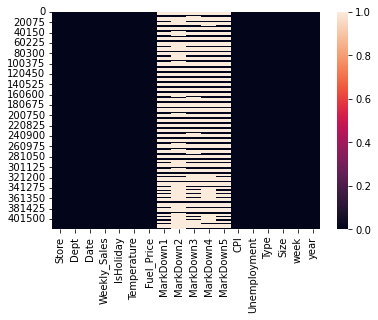

In [31]:
sns.heatmap(final_df.isnull())

#### TASK : write a function that will make scatter plot of weekly sales and column you paasing in as argument- in argument to pass df, column_name

In [32]:
def scatter(df,col):
    plt.figure(figsize=(12,8))
    plt.scatter(x=df['Weekly_Sales'], y=df[col])
    plt.title("Weekly_Sales v/s "+str(col))
    plt.xlabel('Weekly_Sales')
    plt.ylabel(col)

In [33]:
final_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week', 'year'],
      dtype='object')

In [34]:
len(final_df['Store'].unique())

45

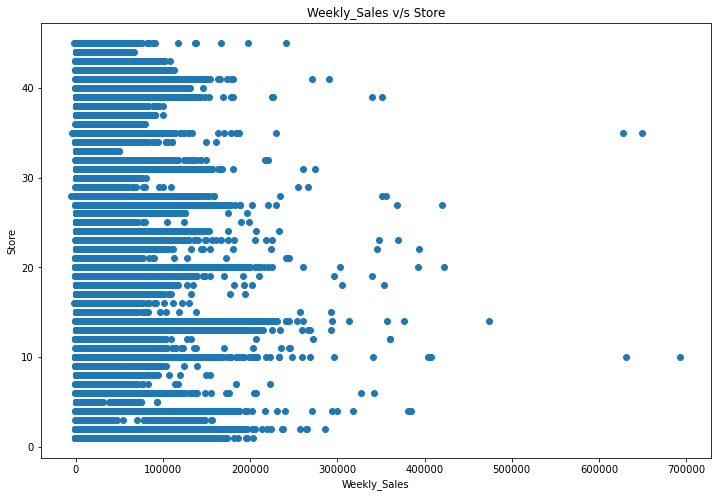

In [35]:
scatter(final_df, 'Store')

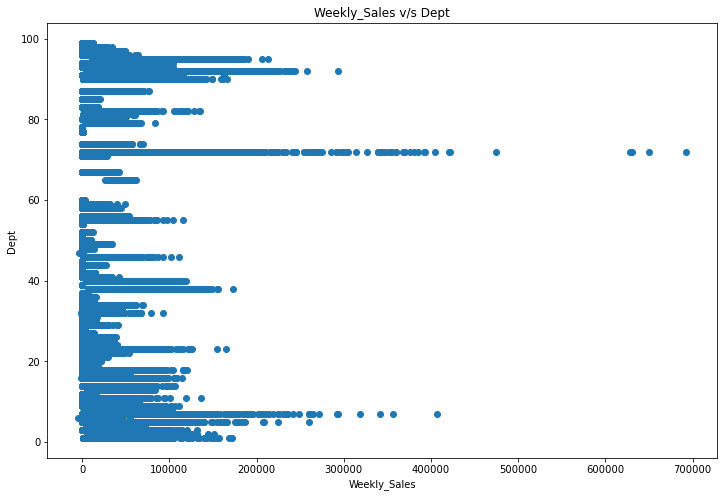

In [36]:
scatter(final_df, 'Dept')

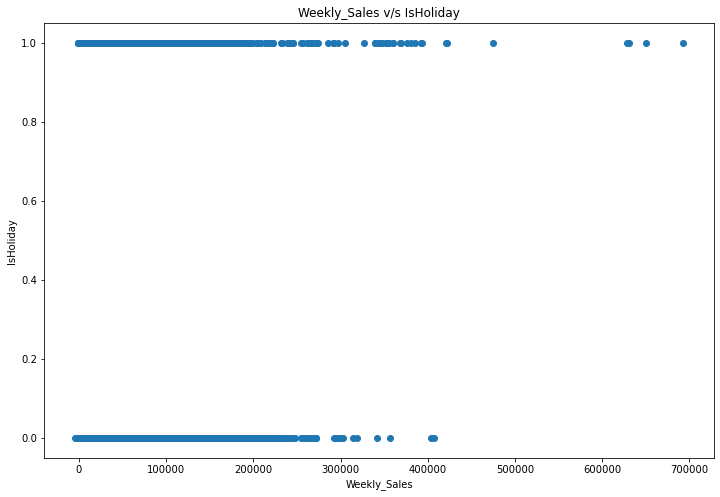

In [37]:
scatter(final_df , 'IsHoliday')

In [38]:
final_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week', 'year'],
      dtype='object')

In [39]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010


In [40]:
final_df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012


In [41]:
## in year 2011 what is average sale weekly
weekly_sales_2011 = final_df[final_df['year']==2011].groupby(['week'])['Weekly_Sales'].mean()

In [42]:
final_df[final_df['week']==5]['Weekly_Sales'].mean()

16029.516788214038

In [43]:
weekly_sales_2012 = final_df[final_df['year']==2012].groupby(['week'])['Weekly_Sales'].mean()

In [44]:
weekly_sales_2010 = final_df[final_df['year']==2010].groupby(['week'])['Weekly_Sales'].mean()

In [45]:
# print(weekly_sales_2010.index)
# print(weekly_sales_2010.values)

<AxesSubplot:xlabel='week'>

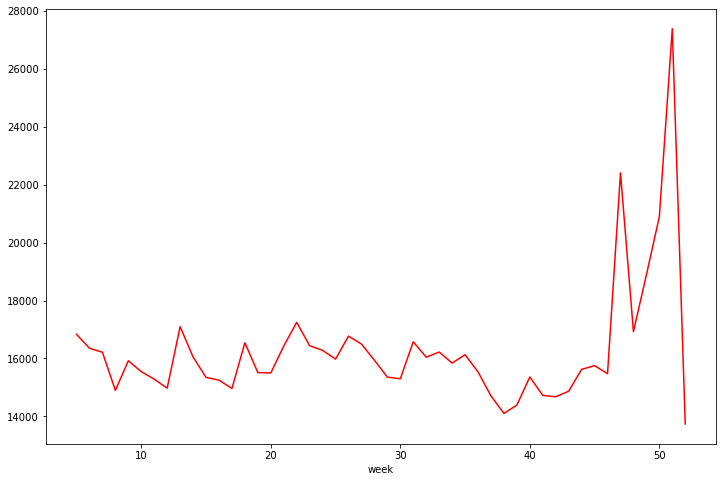

In [46]:
# Plotting weekly_sales_2010
plt.figure(figsize=(12,8))
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values, color='r')

<AxesSubplot:xlabel='week'>

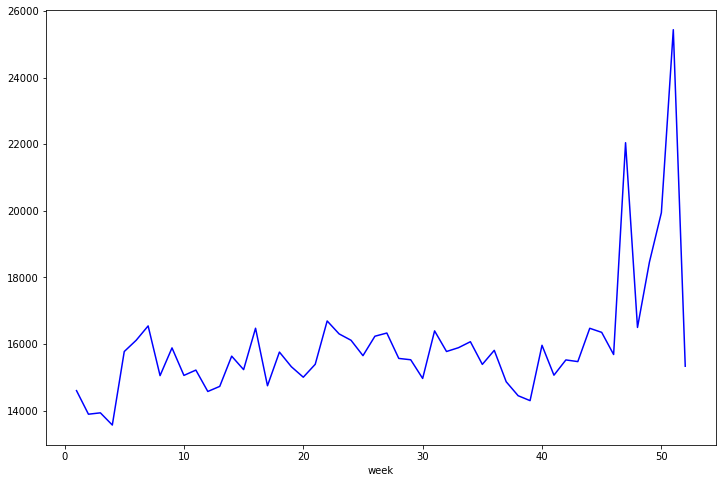

In [47]:
# Plotting weekly_sales_2011
plt.figure(figsize=(12,8))
sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values, color='b')

<AxesSubplot:xlabel='week'>

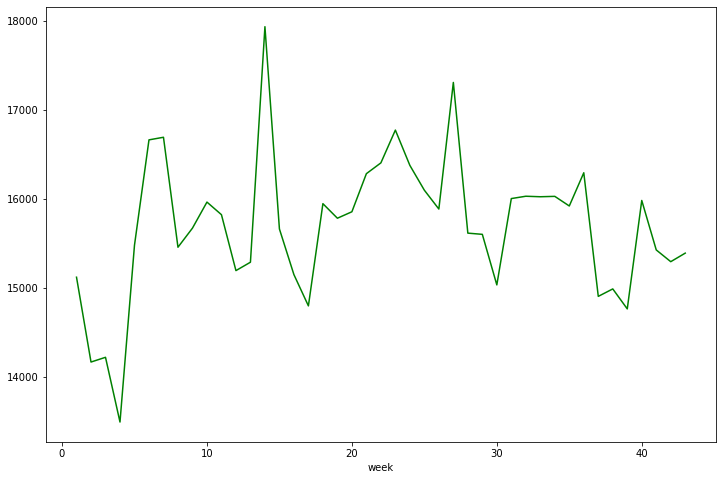

In [48]:
# Plotting weekly_sales_2012
plt.figure(figsize=(12,8))
sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values, color='g')

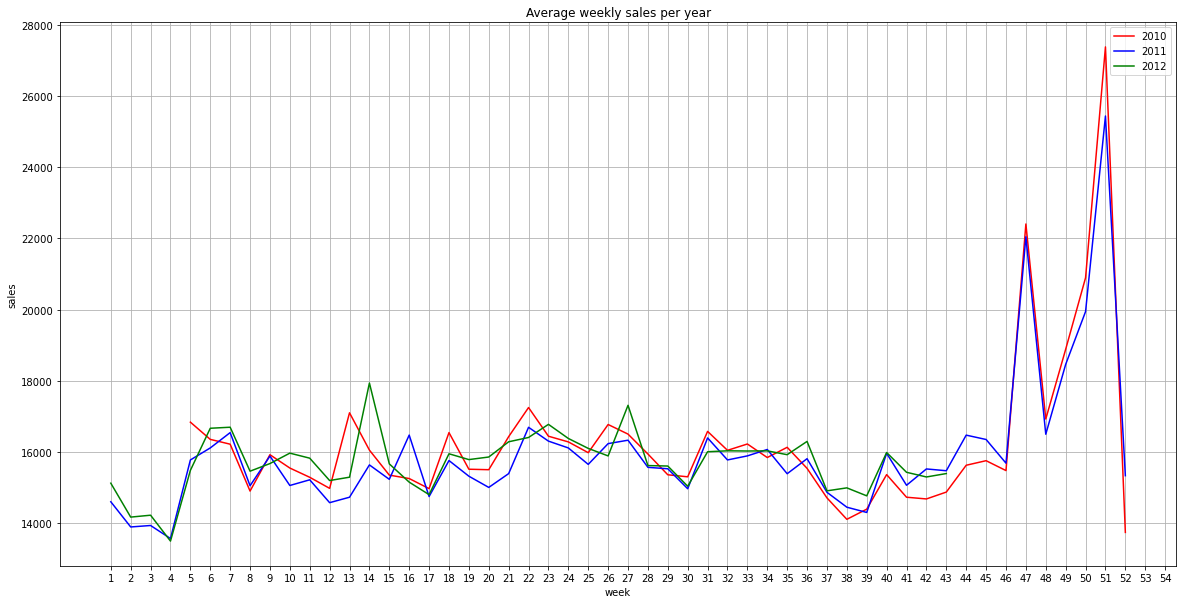

In [49]:
# Plotting weekly sales of all 3 years together
plt.figure(figsize=(20,10))
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values, color='r')
sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values, color='b')
sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values, color='g')
plt.xticks(np.arange(1,55,step=1))
plt.grid()
plt.title('Average weekly sales per year')
plt.xlabel('week')
plt.ylabel('sales')
plt.legend(['2010','2011','2012'])

C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

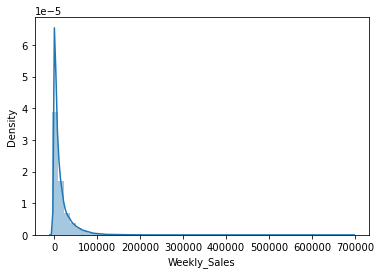

In [50]:
sns.distplot(final_df['Weekly_Sales'])

<AxesSubplot:xlabel='Type', ylabel='Size'>

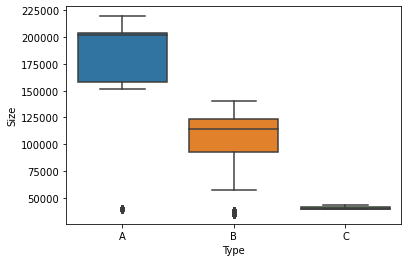

In [51]:
## box plot
## i wanted to find the relationship between "store type" and "store size" using box plot
sns.boxplot(data=final_df, x='Type', y='Size')

In [52]:
final_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week', 'year'],
      dtype='object')

In [53]:
# Which store have highest weekly average sales.
weekly_store_sales = final_df['Weekly_Sales'].groupby(final_df['Store']).mean()

In [54]:
weekly_store_sales

Store
1     21710.543621
2     26898.070031
3      6373.033983
4     29161.210415
5      5053.415813
6     21913.243624
7      8358.766148
8     13133.014768
9      8772.890379
10    26332.303819
11    19276.762751
12    14867.308619
13    27355.136891
14    28784.851727
15     9002.493073
16     7863.224124
17    12954.393636
18    15733.313136
19    20362.126734
20    29508.301592
21    11283.435496
22    15181.218886
23    19776.180881
24    18969.106500
25    10308.157810
26    14554.129672
27    24826.984536
28    18714.889803
29     8158.810609
30     8764.237719
31    19681.907464
32    16351.621855
33     5728.414053
34    13522.081671
35    13803.596986
36     8584.412563
37    10297.355026
38     7492.478460
39    21000.763562
40    13763.632803
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: Weekly_Sales, dtype: float64

In [55]:
weekly_store_sale_df = pd.DataFrame(weekly_store_sales)

In [56]:
weekly_store_sale_df.head()

,Weekly_Sales
Store,
1,21710.543621
2,26898.070031
3,6373.033983
4,29161.210415
5,5053.415813


### .sort_values():
- Sort by the values along either axis.

In [57]:
weekly_store_sale_df.sort_values(by='Weekly_Sales', ascending=False).style.bar(color= '#FFD200')
# store 20 have the highest sales
# store 5 was having minimum sales

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


In [58]:
final_df[final_df['Store']==20]['Type'].unique()

array(['A'], dtype=object)

In [59]:
final_df[final_df['Store'] == 5]['Type'].unique()

array(['B'], dtype=object)

##### TASK - Plot a bar graph with store number as x values and on y axis you should have your weekly avergae sales per store

Text(0, 0.5, 'Sales per store')

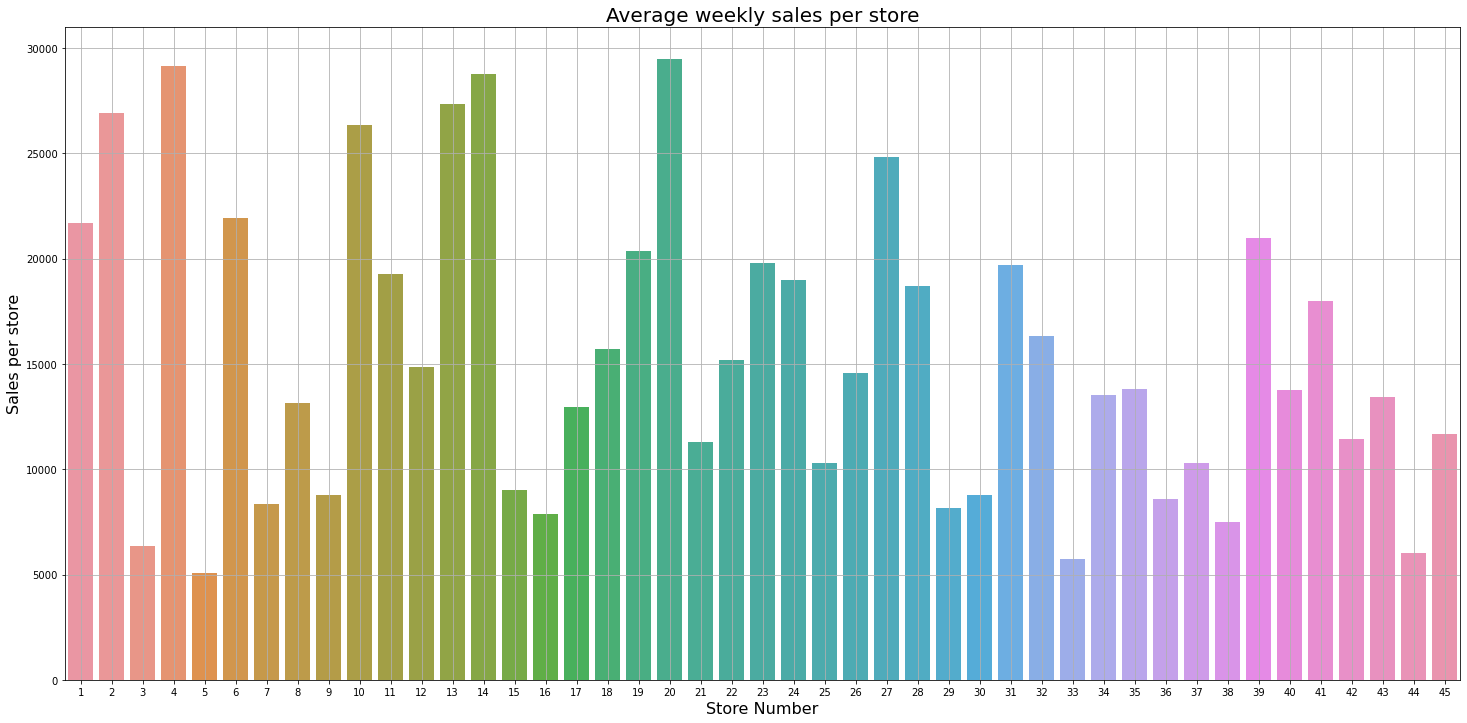

In [60]:
plt.figure(figsize =(25,12))
sns.barplot(x=weekly_store_sales.index, y=weekly_store_sales.values)
plt.grid()
plt.title("Average weekly sales per store", fontsize=20)
plt.xlabel("Store Number", fontsize=16)
plt.ylabel("Sales per store", fontsize=16)

In [61]:
final_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week', 'year'],
      dtype='object')

##### average weekly sales per department


In [62]:
final_df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64)

In [63]:
weekly_sales_dept = final_df.groupby(['Dept'])['Weekly_Sales'].mean()

In [64]:
weekly_sales_dept_df = pd.DataFrame(weekly_sales_dept)

In [65]:
weekly_sales_dept_df.head()

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515


In [66]:
weekly_sales_dept_df.sort_values(by='Weekly_Sales', ascending=False).style.bar()
# department 92 have highest sales
# 43 is having the lowest sales

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


Text(0, 0.5, 'Sales per Department')

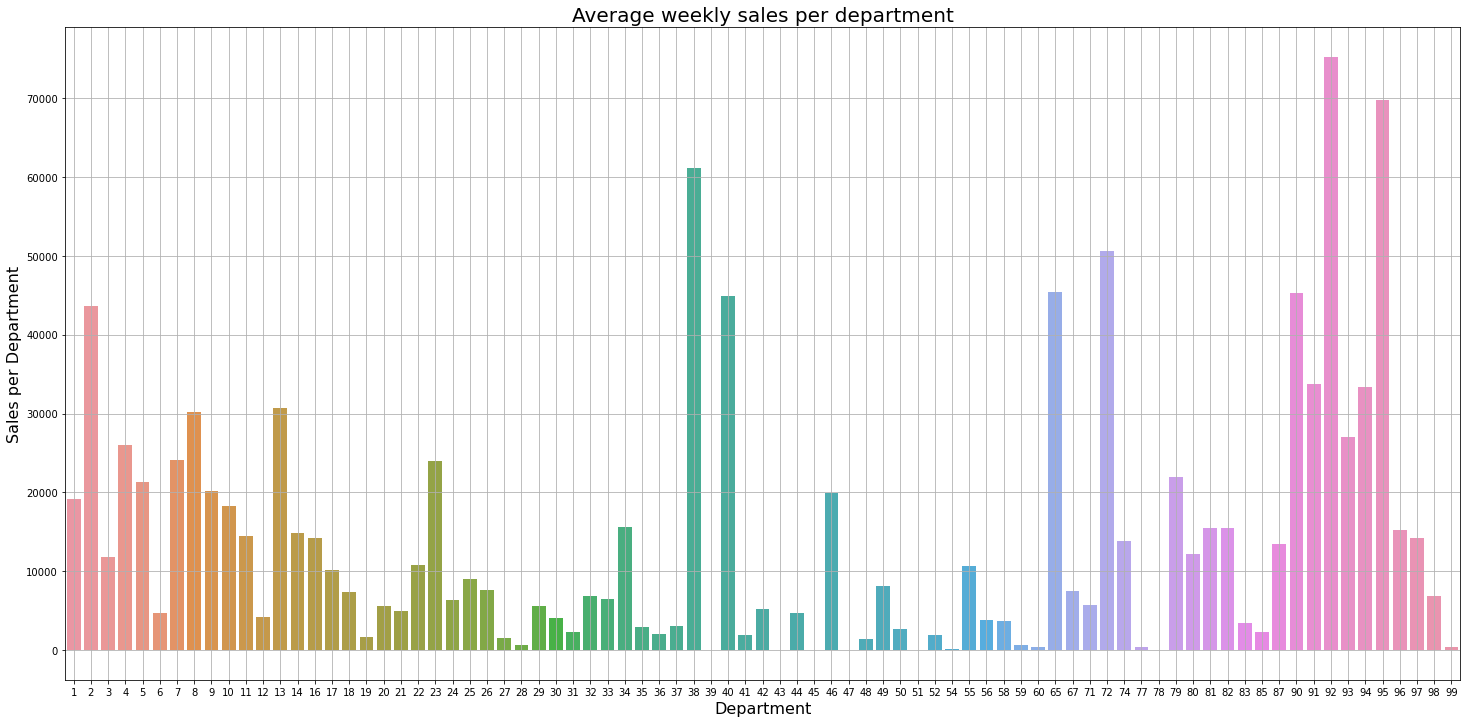

In [67]:
plt.figure(figsize =(25,12))
sns.barplot(x=weekly_sales_dept.index, y=weekly_sales_dept.values)
plt.grid()
plt.title('Average weekly sales per department', fontsize = 20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales per Department', fontsize = 16)

# correlation between features

<AxesSubplot:>

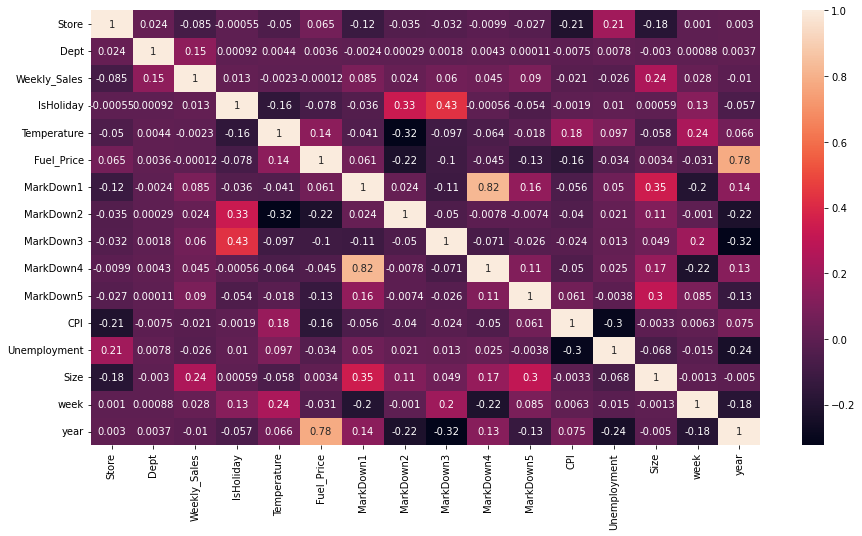

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(final_df.corr(), annot=True)

## Conclusion:
1. department 92 having highest sales
2. store 20 having highest sales
3. store 5 have lowest sales
4. department 43 have lowest sales
5. all years display same pattern and we can clearly see higher sales in the end weeks of the year.
6. we can see some higher sales scenarios when isHoliday is true
7. Type a stores have the larger size whereas type c stores have the smaller size.
8. store 20 that have highest sales belongs so type a whereas store 5 that have lowest sales belong to type c
9. Higher correlation between fuel prices and years.